# chapter2 perceptron

## naive perceptron

In [1]:
# x1, x2を0 or 1として、論理回路を実装する  
# 各ゲートは重みとバイアスが違うだけで全く同じ構造  
# 以下の関数のif節は、活性化関数にステップ関数（閾値を境に出力が切り替わる関数）を使っていると表現できる  

import numpy as np

# AND gate
def AND_gate(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    border = -0.7
    liner_sum = np.dot(x, w) + border
    if liner_sum > 0:
        return 1
    else:
        return 0
    
def OR_gate(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    border = -0.3
    liner_sum = np.dot(x, w) + border
    if liner_sum > 0:
        return 1
    else:
        return 0
    
def NAND_gate(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    border = 0.7
    liner_sum = np.dot(x, w) + border
    if liner_sum > 0:
        return 1
    else:
        return 0

print(AND_gate(1, 0))
print(OR_gate(1, 0))
print(NAND_gate(1, 0))

0
1
1


## XOR_gate(multi layer perceptron)  
XORゲートは非線形領域を示し、１層の単純パーセプトロンでは表現できない  
OR, NANDの出力をANDの入力とすることでXORを表現できる  
つまり、単純パーセプトロンを重ねることによって非線形領域が表現できる  

In [2]:

def XOR_gate(x1, x2):
    y_or = OR_gate(x1, x2)
    y_nand = NAND_gate(x1, x2)
    y = AND_gate(y_or, y_nand)
    return y
    
# 実行結果は排他的論理和を表している
print(XOR_gate(1,0))
print(XOR_gate(1,1))
print(XOR_gate(0,0))

1
0
0


# chapter3 Neural Network

## Activation function  
NNと、多層の単純パーセプトロンとの大きな違いは、１．活性化関数の種類と、２．パラメータを自動で学習する点  
１．単純パーセプトロンではステップ関数を使ったが、NNではシグモイド関数やReLU関数を使う  
２．単純パーセプトロンでは条件を見たすパラメータを事前にハードコーディングしたが、NNは最適なパラメータをデータから学習する

In [3]:
%matplotlib inline

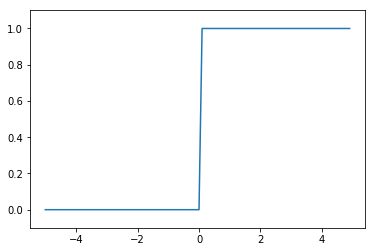

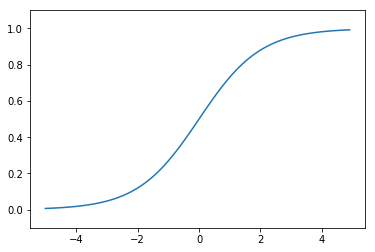

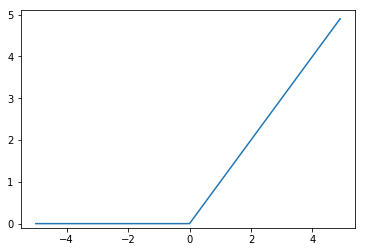

In [4]:

import matplotlib.pyplot as plt

# ステップ関数の実装
def step(x):
    # x(ndarray)に比較演算を行い、0より大きい要素をTrueに、0以下をFalseに変換
    y = x > 0 
    
    # y(Bool型Numpy配列)をastypeでintに変換すると、Trueは1に、Falseは0に変換される
    return y.astype(np.int)


# sigmoid関数の実装
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU関数の実装
def relu(x):
    return np.maximum(0, x)

# 各グラフのプロット
x1 = np.arange(-5, 5, 0.1)
y1 = step(x1)
plt.plot(x1, y1)
plt.ylim(-0.1, 1.1)
plt.show()

x2 = np.arange(-5.0, 5.0, 0.1)
y2 = sigmoid(x2)
plt.plot(x2, y2)
plt.ylim(-0.1, 1.1)
plt.show()

x3 = np.arange(-5.0, 5.0, 0.1)
y3 = relu(x3)
plt.plot(x3, y3)
plt.ylim(-0.1, 5.1)
plt.show()

## multi-dim array

In [5]:
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape) # 配列の形状はインスタンス変数shapeを参照する(関数ではない)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [6]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [7]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.dot(A, B)# np.dot()で行列積計算（ベクトル同士なら内積計算）

array([[19, 22],
       [43, 50]])

NNにおいて、Numpyでの行列計算は実装上とても重要になる  
各層において入力と重みの計算を何度も繰り返すことになるが、それらは全て行列積計算で表せる

In [9]:
# X, W, Yを入力、重み、出力とする
X = np.array([1, 2])
W = np.array([[1,3,5], [2,4,6]])
print(X.shape)
print(W.shape)
Y = np.dot(X, W) # np.dotで一発
print(Y)

(2,)
(2, 3)
[ 5 11 17]


## make simple Neural Network  
入力値に基づいてテキトーな予測値を出力する、隠れ層2つで活性化関数にsigmoidを使ったNNを実装する

In [10]:
import numpy as np

def init_network():
    net = {}
    # dictの要素として重みとバイアスをランダムに初期化
    # np.random.rand()で、引数に指定した形状の,0~1の範囲の乱数配列が作れる
    net['W1'] = np.random.rand(2, 3)
    net['b1'] = np.random.rand(3)
    net['W2'] = np.random.rand(3, 2)
    net['b2'] = np.random.rand(2)
    net['W3'] = np.random.rand(2, 2)
    net['b3'] = np.random.rand(2)
    
    return net

def forward(net, x):
    W1, W2, W3 = net['W1'], net['W2'], net['W3']
    b1, b2, b3 = net['b1'], net['b2'], net['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    # 出力層で、隠れ層からの入力をそのまま流す（恒等関数を用いているといえる）
    y = a3
    
    return y

net = init_network()
x = np.array([1, 0.5])
y = forward(net, x)
print(y)

[1.68772609 1.6156591 ]


上のNNは出力層で恒等関数を使ったが、出力層の設計にも種類がある  
恒等関数は主に回帰問題において使われる  
分類問題においては主にSoftMax関数が使用される   
$ 
    y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)} 
$  
出力層がn個あるとして、k番目の出力$ y_k $を求める計算式  
$ k $番目の入力の指数関数を、全ての入力における指数関数の総和で割ったもので、各要素が0から1の間に収束し、総和は1になる（確率として解釈できる）

In [11]:
# Softmax関数の実装
def softmax(a):
    # eのa乗の計算はすぐに非常に大きな数になり、そのような数同士の除算はオーバーフロー（表現できる桁数を超える）を起こす
    # 配列aの中で最大の要素でaの各要素を減算して、eのa乗の計算結果を正規化
    c = np.max(a)
    a -= c
    
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

y = softmax(np.array([1010, 1000, 990]))
print(y)

# softmax関数は、上述の通り各要素が0~1の範囲に収まり、総和が1になる（確率として解釈可能）
print([0 < i < 1 for i in y])
print(np.sum(y))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
[True, True, True]
1.0


ソフトマックス関数を適用しても、各要素の大小関係は変動しない  
NNにおける分類問題では、出力層のニューロンの数を分類したいクラスの数と同じにして、最も値の大きいニューロンに相当するクラスのみを予測結果とするので、出力層のソフトマックス関数は省略可能

## MNIST classification  
本書のコード(in Github)からMNISTデータとパラメータ学習済みのモデルをimportし、画像の分類を行う

In [12]:
from dlbook.dataset.mnist import load_mnist

# キーワード引数でピクセルデータを0~1に正規化、画像データ（多次元配列）を一次元に変換、one-hot表現の有無を切り替えられる
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


画像を表示する

5
(784,)


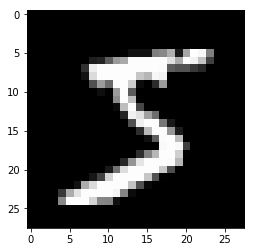

In [13]:
from PIL import Image

def img_show(img):
    # ndarray型のimgを、pillow用のデータオブジェクトに変換
    pil_img = Image.fromarray(np.uint8(img))
    # matplotlib.pyplotを呼び出すことで、jupyter notebookにinline表示する
    plt.imshow(pil_img)
    
img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
img_show(img)

In [15]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('dlbook/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

x, t = get_data()
network = init_network()

accuracy_count = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 最も確率の高い要素のindexを取得
    if p == t[i]:
        accuracy_count += 1

print('Accuracy: ' + str(accuracy_count/len(x)))

Accuracy: 0.9352


## Batch processing

上記は画像データを一枚ずつ処理しているが、100枚ずつまとめて画像が入力された場合を考える  
このようにある程度の単位でまとめられた入力をバッチと呼ぶ（束という意味）  
数値計算ライブラリは、大きな配列を一度に計算するほうが、分割した小さい配列を少しずつ計算するよりも高速に処理できるので、バッチ処理のほうが早く計算が完了する

In [16]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_count = 0

for i in range(0, len(x), batch_size): # range関数にstepとしてbatch_sizeを指定して、データを100個ずつ処理
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_count += np.sum(p == t[i:i+batch_size]) # ()の条件がTrueになる個数
    
print("Accuracy: " + str(accuracy_count / len(x)))


Accuracy: 0.9352


init_network()で呼ばれているnetworkのパラメータは、W1(784,50), W2(50, 100), W3(100, 10)という形状  
ここでxは、1枚ずつの際は(1, 784), バッチ処理の際は(100, 784)の形状で入力されて、W1~3とのdot積が計算される  
行列計算では、1つ目の被演算子の列と2つ目の被演算子の行があっていれば問題なく計算でき、xの1次元目はバッチ処理の有無にかかわらず784なので、predict()などそのものを修正する必要はない